# Term Frequency (TF)
The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.
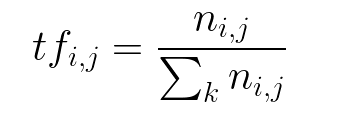

# Inverse Data Frequency (IDF)
The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the **`weight`** of rare words across all documents in the corpus.
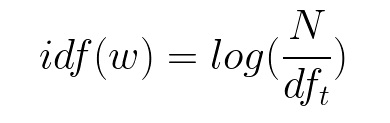

# TF-IDF 
It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

It is simply the TF multiplied by IDF.
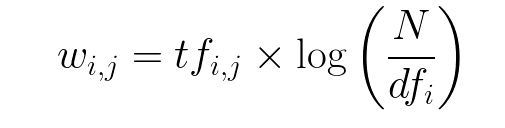

# My Observations
- **`TF`** represents the importance of a word in its text/document.
- **`IDf`** represents the weight a word carries across multiple texts/documents.
- **`IDf` <u>decreases - near 0</u>** as the **`number of documents that contain the word w` <u>increases</u>** ==> **`TF-IDF` <u>decreases</u>**
- **`TF-IDF`** mainly depends on **`TF`** as **`IDf`** is fixed for each word while **`TF`** is dependent on each text/document content.

# TF-IDF Applications
- **`Information retrieval`:** by calculating the TF-IDF score of a user query against the whole document set we can figure out how relevant a document is to that given query. Rumour has it that most search engines around use some sort of TF-IDF implementation, but I couldn't verify that information myself, so take this with a grain of salt.
- **`Keywords extraction`:** The highest ranking words for a document in terms of TF-IDF score can very well represent the keywords of that document(as they make that document stand out from the other documents). So we can very easily use some sort of TF-IDF score computation to extract the keywords from a text. However, if you don't have a big dataset and need to extract keywords from a text, other automated keywords extraction methods come in handy.

# Example
A simple example on how to use TF-IDF

## Imports

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

## Data

In [3]:
# Data
documents = [
    'the man went out for a walk',
    'the children sat around the fire'
]

## TF-IDF Calculation

In [4]:
# TF-IDF Transformer
tf_Idf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

# Transform & Fit Data
tf_Idf_fit = tf_Idf.fit_transform(documents)

# Get Features (Columns)
feature_names = tf_Idf.get_feature_names()

# Transform the Sparse Matrix
dense = tf_Idf_fit.todense()
denselist = dense.tolist()

# Create A DataFrame
df = pd.DataFrame(denselist, columns=feature_names, index=['document A', 'document B'])

## The TF-IDF model

In [5]:
tf_Idf

TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

## TF-IDF sparse matrix result

In [ ]:
tf_Idf_fit

## The words TF-IDF gathered

In [ ]:
feature_names

## The sparse matrix we got from the TF-IDF fit

In [ ]:
dense

In [ ]:
denselist

## TF-IDF Table

In [ ]:
df

* Note that in an example with more text, the score for the word **`the`** would be greatly reduced.

## The final result of ranked words/phrases

In [ ]:
result = pd.DataFrame()
result[['word', 'rank']] = df.mean().reset_index()
result = result.sort_values('rank', ascending=False).reset_index(drop=True)
result

## The result of ranked words/phrases for a single text/document

In [6]:
documentA_tf_idf = pd.DataFrame(denselist[0], columns=['TF-IDF'], index=feature_names)
documentA_tf_idf.sort_values('TF-IDF', ascending=False)

<2x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

## The words TF-IDF gathered

In [7]:
feature_names

['children',
 'children sat',
 'man',
 'man went',
 'sat',
 'walk',
 'went',
 'went walk']

## The sparse matrix we got from the TF-IDF fit

In [8]:
dense

matrix([[0.        , 0.        , 0.4472136 , 0.4472136 , 0.        ,
         0.4472136 , 0.4472136 , 0.4472136 ],
        [0.57735027, 0.57735027, 0.        , 0.        , 0.57735027,
         0.        , 0.        , 0.        ]])

In [9]:
denselist

[[0.0,
  0.0,
  0.447213595499958,
  0.447213595499958,
  0.0,
  0.447213595499958,
  0.447213595499958,
  0.447213595499958],
 [0.5773502691896257,
  0.5773502691896257,
  0.0,
  0.0,
  0.5773502691896257,
  0.0,
  0.0,
  0.0]]

## TF-IDF Table

In [10]:
df

,children,children sat,man,man went,sat,walk,went,went walk
document A,0.00000,0.00000,0.447214,0.447214,0.00000,0.447214,0.447214,0.447214
document B,0.57735,0.57735,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000


* Note that in an example with more text, the score for the word **`the`** would be greatly reduced.

## The final result of ranked words/phrases

In [11]:
result = pd.DataFrame()
result[['word', 'rank']] = df.mean().reset_index()
result = result.sort_values('rank', ascending=False).reset_index(drop=True)
result

,word,rank
0,children,0.288675
1,children sat,0.288675
2,sat,0.288675
3,man,0.223607
4,man went,0.223607
5,walk,0.223607
6,went,0.223607
7,went walk,0.223607


## The result of ranked words/phrases for a single text/document

In [12]:
documentA_tf_idf = pd.DataFrame(denselist[0], columns=['TF-IDF'], index=feature_names)
documentA_tf_idf.sort_values('TF-IDF', ascending=False)

,TF-IDF
man,0.447214
man went,0.447214
walk,0.447214
went,0.447214
went walk,0.447214
children,0.000000
children sat,0.000000
sat,0.000000
